<a href="https://colab.research.google.com/github/1kruidenp/PRA3500/blob/master/Week1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this first code of block we do task 1.1 and 1.2.
We create functions that calculate the chances for all 4 outcomes from a real population which is created at first. All the steps are described in the green comments. 

The result that we get is that only 16.6 percent of the people tested positive actually carry the antibodies.
For task 1.2 we find that when 5% of the population carries the antibody, will 50% of the people tested positive being antibody carriers.





Population with antibodies: 5022
Population of Positive people tested positive: 4981
Population of Positive people tested negative: 41
Population of Negative people tested negative: 470076
Population of Negative people tested positive: 24902
Percentage of people tested positive actually being positive: 16.668339858782584
Percentage of people tested negative actually being negative: 99.99127876677508




Text(0, 0.5, 'Percentage of positive tested people actually positive')

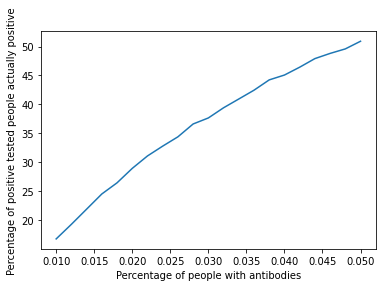

In [1]:
#Tasks 1.1 and 1.2


import numpy as np
import matplotlib.pyplot as plt

#Below we define all of our constants, each is explained with a comment above

#Percentage of population having antibodies
Per_Anti=0.01
#Number of population we will be testing
Population=500000
#Percentage of positive test being real positive
Per_PTP=0.99
#Percentage of positive test being false negative
Per_PTN=0.01
#Percentage of negative test being real negative
Per_NTN=0.95
#Percentage of negative test being fake positive
Per_NTP=0.05


#Here we create a list. The length of the list is the size of the population we use. We have two values, 0 and 1.
#Zero is chosen with a probability of 99%, the percentage of the population with no antibodies
#1 means that they do have antibodies, the percent chance that they have this is 1%
Ar=np.random.choice(2,Population,p=[1-Per_Anti, Per_Anti])
Dataset=list(Ar)

#Here we count the amount of people that have and do not have the antibodies. The amount with is printed in the output
Pop_RP=Dataset.count(1)
Pop_RN=Dataset.count(0)
print("Population with antibodies: " + str(Pop_RP))


#Here we create a test function for positive results to the antibodies. 
# Two percentages can be given Per0 and Per1 where Per0 is the prob. that a positive person is tested negative
#Per1 is the prob. that the positive person is tested positive
#I made it a function so that the percentages could be altered in the future
#The function creates a list for the positive population and shows which are tested positive and negative
def PositiveTest(Data, Per0, Per1):
  #99% of real positive become tested positive and 1% will become tested negative
  PosTest=list(np.random.choice(2,Data,p=[Per0, Per1]))
  return PosTest

#Same here, Per0 is the probability that a negative person is tested negative and Per1 for a negative person is tested positive
def NegativeTest(Data, Per0, Per1):
  #95% of real negative become tested negative and 5% will become tested positive
  NegTest=list(np.random.choice(2,Data,p=[Per0, Per1]))
  return NegTest


#Here we call the function and then count the tests in the list made by the function
PosTest=PositiveTest(Pop_RP, Per_PTN, Per_PTP)
Pop_PTP=PosTest.count(1)
Pop_PTN=PosTest.count(0)

#Same here
NegTest=NegativeTest(Pop_RN, Per_NTN, Per_NTP)
Pop_NTN=NegTest.count(0)
Pop_NTP=NegTest.count(1)


#Here we print our results
print("Population of Positive people tested positive: " + str(Pop_PTP))
print("Population of Positive people tested negative: " + str(Pop_PTN))
print("Population of Negative people tested negative: " + str(Pop_NTN))
print("Population of Negative people tested positive: " + str(Pop_NTP))


#Here we create a function where the chance of a positive person tested positive is calculated, and the same for a negative person tested negative.
#I chose to do a function so then if we change something(as we do in the next task) it can be called and not repeated again
def chance_Pos(PTP, NTP):
  Chance=(PTP/(PTP+NTP))*100
  return Chance
def chance_Neg(NTN, PTN):
  Chance=(NTN/(NTN+PTN))*100
  return Chance

#Here we print our results
print("Percentage of people tested positive actually being positive: " + str(chance_Pos(Pop_PTP, Pop_NTP)))
print("Percentage of people tested negative actually being negative: " + str(chance_Neg(Pop_NTN, Pop_PTN)))


#Here we start task 2
print("")
print("")

#We stard by making a list which will be the data we will be plotting in the end. 
#Initially it is just a zero
import matplotlib.pyplot as plt
fig_dataX=[0]
fig_dataY=[0]

#Here we create a loop which continues until the chance that a tested positive is actually positive is 50%
#we iterate over i, which goes up by 1 each loop, and represents the index of the data we are plotting (X,y)
#In this loop we follow all the steps done above, but at the end, the percentage of people with antibodies is increased with 0.2%
#It is increased so small so to smoothen the final curve, as we have more data points by doing so.
#This does of course slow the computation.
i=0
while chance_Pos(Pop_PTP, Pop_NTP)<50:
 
  
  Dataset=list(np.random.choice(2,Population,p=[1-Per_Anti, Per_Anti]))

  Pop_RP=Dataset.count(1)
  Pop_RN=Dataset.count(0)
  PosTest=PositiveTest(Pop_RP, Per_PTN, Per_PTP)
  Pop_PTP=PosTest.count(1)
  Pop_PTN=PosTest.count(0)

  NegTest=NegativeTest(Pop_RN, Per_NTN, Per_NTP)
  Pop_NTN=NegTest.count(0)
  Pop_NTP=NegTest.count(1)
  fig_dataX[i]=Per_Anti
  fig_dataY[i]=chance_Pos(Pop_PTP, Pop_NTP)
  fig_dataX.append(1)
  fig_dataY.append(1)
  i+=1
  Per_Anti = Per_Anti+0.002


#This deletes the last index of our data as we append one at the end of the loop which is not needed
fig_dataX.pop()
fig_dataY.pop()

#Here we plot our data
#I also found that increasing population smoothes curve
#Result is that for 50% of positive tests you would need 5% of population to have antibodies
plt.plot(fig_dataX,fig_dataY)
plt.xlabel("Percentage of people with antibodies")
plt.ylabel("Percentage of positive tested people actually positive")




  
    

In the following text block we complete tasks 2.1 and 2.2.

In the output you see the final histograms for each distribution, they seem accurate, this is due to the large datasize.

Task 2.2 seems alright, however when comparing to an online calculator there is a difference. This may be due to the large bin sizes, so the probabilities aren't spread as much.

Comments are written for each step


The sum of the probability function between 2 and 5 is: 0.5004360113797808



(array([6.2919e+04, 2.3434e+04, 8.5220e+03, 3.3360e+03, 1.1210e+03,
        4.2600e+02, 1.7100e+02, 3.9000e+01, 1.8000e+01, 1.2000e+01,
        3.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 11 Patch objects>)

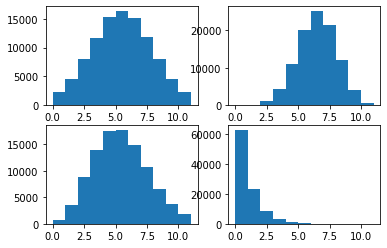

In [2]:


import math
import random
from bisect import bisect
from random import random


#n symbolizes the amount of different events that could happen.(For a die this would be 6). 
#I chose 10 as then i could set all distributions to range between 0 and 10
n=10
#Probability of event happening. This is only for the binomial function
p=0.6
#Here we define the number of bins needed in our histogram. There 11 as we count 0 as well as 10 to be a bin
bins=11
#Define math functions
sqrt=math.sqrt
pi=math.pi
#This is needed for the gaussian distribution, we chose the stdev and mean to be these values so that the distribution would spread between 0 and 10
stdev=2.5
mean=5
#This is the amount of data points that we will be sorting into bins.
#A large set is chosen to have an accurate look at what the distribution should look like
datasize=100000
#Beta and Mu are needed in the exponential function. These values are chosen as when beta is 1 and mu is 0, it is a standard exponential distribution
Beta=1
Mu=0
#This is for task 2.2, and is the two points where we want to find the sum of the probability distribution function
rangemin=2
rangemax=5
#0-10 (11 bins)
x=[0]*(n+1)
P=[0]*(n+1)
#The below probabilities are not needed, I could chose to plot one of the functions (shown below) but i chose to plot all in my output to show all the results
P1=[0]*(n+1)
P2=[0]*(n+1)
P3=[0]*(n+1)
y=[0]*(datasize+1)
#The same applies for the y values just like for the P values
y1=[0]*(datasize+1)
y2=[0]*(datasize+1)
y3=[0]*(datasize+1)


#This is taken from https://stackoverflow.com/questions/3679694/a-weighted-version-of-random-choice
#What it does is depending on the probability of every value for x, it choses and returns a value based upon these probability
def weighted_choice(choices):
    values, weights = zip(*choices)
    total = 0
    cum_weights = []
    for w in weights:
        total += w
        cum_weights.append(total)
    X = random() * total
    i = bisect(cum_weights, X)
    return values[i]

#Here we define the probability functions
#The gaussian function is based off of the definition found at https://stattrek.com/probability-distributions/normal.aspx
def gaussian(stdv,mean,x):
  P=(1/(sqrt(2*(stdv**2)*pi)))*(math.exp((-0.5*(x-mean)**2)/(stdv**2))) 
  return P
#The binomial function is based off of the definition found at http://www-library.desy.de/preparch/books/vstatmp_engl.pdf page 56
def binomial(n,p,x):
  q=1-p
  P=((math.factorial(n))/((math.factorial(n-x))*math.factorial(x)))*(p**x)*(q**(n-x))
  return P
#The poisson function is based off of the definition found at https://brilliant.org/wiki/poisson-distribution/
def poisson(mean, x):
  P=((mean**x)*(math.exp(-2.5)))/(math.factorial(x))
  return P
#The exponential is based off of the defintion found at https://www.itl.nist.gov/div898/handbook/eda/section3/eda3667.htm
def exponential(Beta, Mu, x):
  if Mu>x:
    return "error: Mu must be smaller or equal than x"
  if Beta<=0:
    return "error: Beta must be larger than zero"
  P=(1/Beta)*math.exp(-(x-Mu)/Beta)
  return P

#Here we define a function which is used for task 2.2, where we find the sum of probabilities.
#We can choose for which distribution function it is done for, in this case we do it for the gaussian.
#A loop is made where for each x point, we find the probability and add it to a total probability, this is then returned once fully iterated.
def sum(rangemin,rangemax):
  Ptot=0
  k=0
  for k in range(rangemin,rangemax+1):#otherwise rangemax is skipped
    Ptot=Ptot+gaussian(stdev,mean,x[k])
    #Ptot=Ptot+binomial(n,p,x[k])
    #Ptot=Ptot+poisson(mean,x[i])
    #Ptot=Ptot+exponential(Beta, Mu, x[i])
    k=k+1
  return Ptot

#Here we fill the x list with values between 0 and 11 (bins) 
#and their corresponding probability which is found by calling the correct prob. distribution function.
#Normally we can choose just one, but as i would like to show the result for all i did it for all four.
i=0
for i in range(n+1):
  x[i]=i
  P[i]=gaussian(stdev,mean,x[i])
  #P[i]=binomial(n,p,x[i])
  #P[i]=poisson(mean,x[i])
  #P[i]=exponential(Beta, Mu, x[i])

  P1[i]=binomial(n,p,x[i])
  P2[i]=poisson(mean,x[i])
  P3[i]=exponential(Beta, Mu, x[i])

  i=i+ 1

#Here we call the weighted_choice function to find the y values based on the probabilities found before. 
#This is then assigned to a y value, which iterates untill the last datapoint.
j=0
for j in range(datasize+1):
    y[j]=weighted_choice([(x[0],P[0]), (x[1],P[1]), (x[2],P[2]), (x[3],P[3]), (x[4],P[4]), (x[5],P[5]), (x[6],P[6]), (x[7],P[7]), (x[8],P[8]), (x[9],P[9]), (x[10],P[10])])
    #the bottom are not needed but as i want to show all my graphs in the output i copied for all functions
    y1[j]=weighted_choice([(x[0],P1[0]), (x[1],P1[1]), (x[2],P1[2]), (x[3],P1[3]), (x[4],P1[4]), (x[5],P1[5]), (x[6],P1[6]), (x[7],P1[7]), (x[8],P1[8]), (x[9],P1[9]), (x[10],P1[10])])
    y2[j]=weighted_choice([(x[0],P2[0]), (x[1],P2[1]), (x[2],P2[2]), (x[3],P2[3]), (x[4],P2[4]), (x[5],P2[5]), (x[6],P2[6]), (x[7],P2[7]), (x[8],P2[8]), (x[9],P2[9]), (x[10],P2[10])])
    y3[j]=weighted_choice([(x[0],P3[0]), (x[1],P3[1]), (x[2],P3[2]), (x[3],P3[3]), (x[4],P3[4]), (x[5],P3[5]), (x[6],P3[6]), (x[7],P3[7]), (x[8],P3[8]), (x[9],P3[9]), (x[10],P3[10])])

#Here we call the total sum for task 2.2 and print it.
Psum=sum(rangemin,rangemax)
print("")
print("The sum of the probability function between " + str(rangemin) + " and " + str(rangemax) + " is: " + str(Psum))
print("")

#Here we create four graphs, which represent the four distributions
#Top left is gaussian
#Top right is binomial
#bottom left is poisson
#bottom right is exponential
fig = plt.figure()
pl = fig.add_subplot(221)
pl1 = fig.add_subplot(222)
pl2 = fig.add_subplot(223)
pl3 = fig.add_subplot(224)

pl.hist(y,bins, range=[0, 11])
pl1.hist(y1,bins, range=[0, 11])
pl2.hist(y2,bins, range=[0, 11])
pl3.hist(y3,bins, range=[0, 11])






Task 2.3

In the code below, I struggled to plot a completely continuous distribution. Instead I plotted the distribution with many x values, as to make it as smooth and continuous as possible. The result is shown in the output below and seems good. We call the functions defined before

Comments are made for each step.

(-5.0, 15.0)

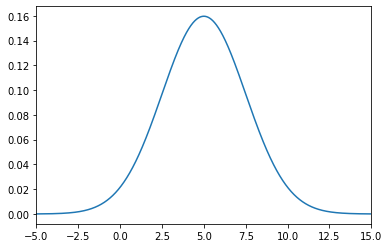

In [3]:
#Task 2.3

#For the continuous distribution, we choose 1000 x points. This doesn't make it fully continous but i struggled plotting a function without defining x
#The larger nC is, the more continuous the distribution will be.
nC=10000
#here we choose in what range we want to plot our continuous set. 
xmin=-5
xmax=15
#Here we create a list between the two range defined above, with equal spacing between each x points.
xC=np.linspace(xmin,xmax,nC+1)
#Below a list for the probabilities is made, the same size as xC and will be filled up later.
PC=[0]*(nC+1)

#In the loop we fill up the list for probability by calling the function that we want to graph as a continuous function.
i=0
for i in range(nC+1):
  PC[i]=gaussian(stdev,mean,xC[i])
  i=i+1
#Here we plot the continuous distribution
plt.plot(xC,PC)
plt.xlim(xmin,xmax)


For taks 3.1, we used the equations given in the question sheet to find the expectation values for a discrete and continuous distribution.

I managed to find the expecation value for any discrete distribution fairly easily, however it did not get the exact value. For the discrete gaussian we expected to get a value of 5, but got 4.87.

For the continuous distribution we did manage to get the correct value however, we did not use any of the work done before.

In [4]:
 #Task 3.1
 
 from scipy.integrate import quad

#Below we create a function which callates the expectation value for discrete distributions.
#What the function does is it iterates over the x and P values from the distribution, and multiplies each x with its corresponding P.
#This is then added to a sum value each iteration until the last index.
def dis_expectation(x,P):
  Sum=0
  i=0
  for i in range(n+1):
    Sum=Sum+x[i]*P[i]
    i=i+1
  return Sum

#Here we call our function using the x and P defined when we made our discrete gaussian function above, and print it below
print(dis_expectation(x,P))

#I had trouble integrating over the continuous function defined before, so what i did instead is rewrite the function below and integrate over x
#I also had difficulty with indefinite integrals, so I set two boundaries which is large enough to cover the important part of the gaussian function
def integrand(x):
  return ((1/(sqrt(2*(stdev**2)*pi)))*(math.exp((-0.5*(x-mean)**2)/(stdev**2))))*x
ans, err = quad(integrand,-20,30)
#Here i print the expected value for a continuous gaussian distribution
print(ans)
  


4.866122757765516
5.000000000000001


Task 3.2

I have never seen deal or no deal, so not sure if i did it correctly but did it based off of the directions.
I created 20 boxes, let the user pick one randomly, and took 3 random boxes out. Then from the remaining boxes i calculated the expectation value of the prize money. 


In [5]:
#Task 3.2

import random

#We start by creating 20 boxes
n=20
box=[0]*20
#In each box we put a prize money, I multiplied by 1000 as 1-20 dollars doesnt seem like much money :D
for i in range(n):
  box[i]=(i+1)*1000

#In the first statement we show each box and how much money it contains
print("Welcome to deal or no deal, we have twenty box's each containing the following amount: " )
print("")
print(box)
print("")
print("We will now shuffle the box's and place them in a row")
print("")
#Here the box is shuffled randomly so that the "contestant" doesnt know in which index each box is
random.shuffle(box)

#The contestant chooses his final box which wont be opened yet.
#This is done by asking which index he wants and then the value of that index in the box list is taken
box_chos = int(input("Please choose the box in the row that you want: "))
box_chosen=box[box_chos-1]
print("")
print("You chose " + str(box_chos)+ ". This box will not be opened yet!")
#Here the box chosen is taken out as that one cant be chosen.
del box[box_chos-1]
print("")
print("Now three more boxes are chosen at random.")

i=0
j=0
k=0 
#Here we choose 3 random box's through a function that chooses a random number in the list.
#In the loop we check for the value that was taken and remove the money so that it doesnt get calculated in the expectation value.
box1=random.choice(box)
for i in range(n-1):
  if box[i]==box1:
    box[i]=0
  elif box[i]!=box1:
   i=i+1

box2=random.choice(box)
for j in range(n-1):
  if box[j]==box2:
    box[j]=0
  elif box[j]!=box2:
   j=j+1

box3=random.choice(box)
for i in range(n-1):
  if box[k]==box3:
    box[k]=0
  elif box[k]!=box3:
   k=k+1

#Here we print what the values taken from each box is
print("")
print("The three boxes chosen contain values : " +str(box1)+ ", "+ str(box2)+", "+str(box3))

#The we create a probability list containing the P for each box
box.append(box_chosen)
P=[0]*(n+1)
i=0
#The probability list is filled up here, they should all be the same and 1/17 which is the number of boxes left, or the length of boxes.
for i in range(n+1):
  P[i]=1/17
  i=i+1

#Here we add one more zero to the box list, as otherwise the expectaion function defined above wont work when called.
# The zero wont affect the expectation value as it is multiplied so you are adding zero to the sum
box.append(0)
#Here we call the discrete expectation value created previously
ex_value=dis_expectation(box,P)
#Here we print our final result
print("")
print("The expected amount in this box is: " + str(ex_value)+ "$")
print("Your box has: " + str(box_chosen)+"$")





Welcome to deal or no deal, we have twenty box's each containing the following amount: 

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]

We will now shuffle the box's and place them in a row

Please choose the box in the row that you want: 8

You chose 8. This box will not be opened yet!

Now three more boxes are chosen at random.

The three boxes chosen contain values : 9000, 20000, 14000

The expected amount in this box is: 9823.529411764706$
Your box has: 12000$
